In [28]:
import torch

In [29]:
# input size is 2, hidden size is 3
rnn = torch.nn.LSTM(2, 3)
input = torch.randn(1, 2)
# h and c are the same size
h0 = torch.randn(1, 3)
c0 = torch.randn(1, 3)
output, (hn, cn) = rnn(input, (h0, c0))

# Output is the same as the hidden size if the sequence length is 1
assert (output==hn).all()
# Of course, the sizes must be the same too
assert output.size() == (1, 3)
assert hn.size() == (1, 3)
# again, c is the same size as h
assert cn.size() == (1, 3)
# but they are not the same 
assert (hn!=cn).all()


Note, since we are taking care of the iteration, output==hn, but they are both returned since if you let the LSTM iterate, they are different.

So, in our language, in_features = $\text{input\_size} + 2*\text{hidden\_size}$ and to make the operator square the output is the same.  However, this is too restrictive, since the output size will likely want to be a function of the data (e.g., being 10 for MNIST).

Note, you could make the hidden_size large, but only evaluate the loss on part of it, but that seems like it would be hard to justify.

In [30]:
# input size is 2, hidden size is 3, output size is 1
rnn = torch.nn.LSTM(2, 3, proj_size=1)
input = torch.randn(1, 2)
# h and c are the same size
h0 = torch.randn(1, 1)
c0 = torch.randn(1, 3)
output, (hn, cn) = rnn(input, (h0, c0))

print(output)
print(hn)
print(cn)
# Output is the same as the hidden size if the sequence length is 1
assert (output==hn).all()
# Of course, the sizes must be the same too
assert output.size() == (1, 1)
assert hn.size() == (1, 1)
# again, c is the same size as h
assert cn.size() == (1, 3)
# but they are not the same 
assert (hn!=cn).all()

tensor([[0.1750]], grad_fn=<SqueezeBackward1>)
tensor([[0.1750]], grad_fn=<SqueezeBackward1>)
tensor([[-1.0843, -0.6397, -0.2439]], grad_fn=<SqueezeBackward1>)


So, in our language, in_features = $\text{input\_size} + \text{hidden\_size} + \text{proj\_size}$ and to make 
the operator square the output is the same.  

Note, the hidden_size part of the vector becomes cn and the proj_size part of the vector becomes hn.

In the documentation (https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) they mention a paper (https://arxiv.org/pdf/1402.1128.pdf) in which there are two ways of doing the projection, namely

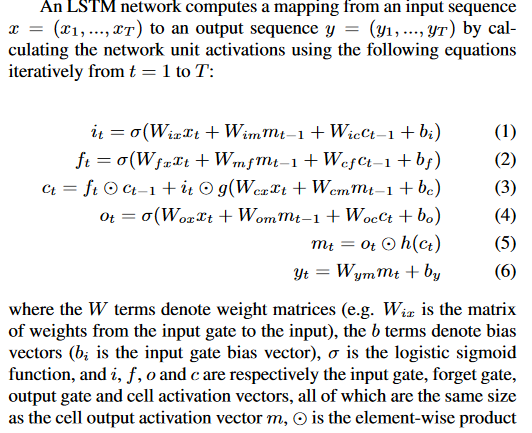

or

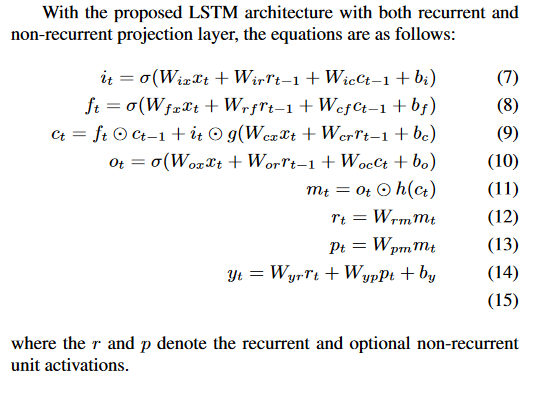

When they say that

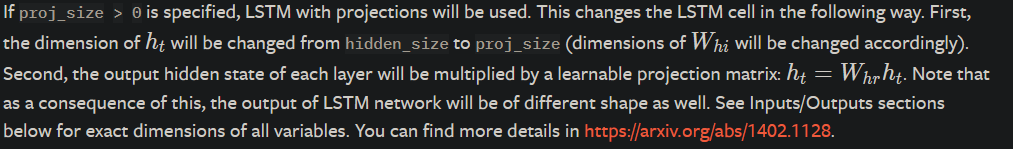

and their equations are

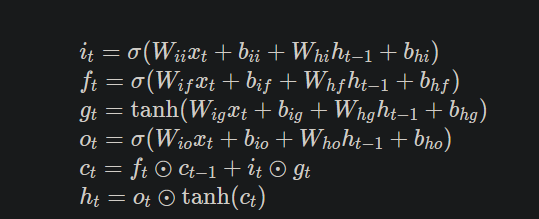

This only way this makes sense is if they are doing the second one, which seems very strange to me!  

Indeed the first is more expensive, but it seems to make a lot more sense to me.  Throwing away a high-dimensional $h_t$ seems like a waste, but it would be faster.  I guess the claim in that the memory lives in $c_t$ which is indeed high-dimensional, but I don't see why you would want to throw away $h_t$.